## **Récupération du fichier de travail et préparation des données**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/ML_C02.csv', index_col = 0)
# Le document ML_02.csv est le DataFrame obtenu après nettoyage et analyse du DataFrame initial df_2013.csv
# C'est à partir de ses données que nous effectuerons tout le travail de Machine Learning

In [ ]:
df.head()

,Marque,cat,mq,genre,Carburant,gamme2,Hybride,Puissance maximale (kW),Consommation urbaine (l/100km),HC+NOX (g/km),masse vide euro min (kg),Carrosserie,cat_poll,boite,rapport,norme EURO
0,ALFA-ROMEO,M10,ALF,VP,ES,MOY-SUPERIEURE,non,147.0,11.3,0.225175,1505,BREAK,E,M,6,EURO5
1,ALFA-ROMEO,M10,ALF,VP,GO,MOY-SUPERIEURE,non,125.0,6.6,0.190000,1565,BERLINE,C,M,6,EURO5
2,ALFA-ROMEO,M10,ALF,VP,GO,MOY-SUPERIEURE,non,100.0,6.6,0.175000,1565,BERLINE,C,M,6,EURO5
3,ALFA-ROMEO,M10,ALF,VP,GO,MOY-SUPERIEURE,non,100.0,6.6,0.175000,1565,BERLINE,C,M,6,EURO5
4,ALFA-ROMEO,M10,ALF,VP,GO,MOY-SUPERIEURE,non,125.0,6.9,0.193000,1565,BERLINE,C,M,6,EURO5


In [ ]:
# On checke les doublons
print('Il y a ', df.duplicated().sum(), 'doublons dans le dataset')

Il y a  38958 doublons dans le dataset


In [ ]:
# Suppression des doublons
df = df.drop_duplicates()

In [ ]:
# Mise à jour des variables
# Suppression d'une variable en double (mq et Marque)
df = df.drop('mq', axis = 1)

# On renomme quelques variables
variables = {'gamme2' : 'gamme',
             'Puissance maximale (kW)' : 'puiss_max',
             'Consommation urbaine (l/100km)' : 'conso_urb',
             'HC+NOX (g/km)' : 'hcnox',
             'masse vide euro min (kg)' : 'masse_ordma_min',
             'norme EURO' : 'norme_EUR'}

df = df.rename(variables, axis = 1)

In [ ]:
df.info()
# Le DataFrame comporte 5 variables numériques et 10 variables catégorielles

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 44849
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marque           5273 non-null   object 
 1   cat              5273 non-null   object 
 2   genre            5273 non-null   object 
 3   Carburant        5273 non-null   object 
 4   gamme            5273 non-null   object 
 5   Hybride          5273 non-null   object 
 6   puiss_max        5273 non-null   float64
 7   conso_urb        5273 non-null   float64
 8   hcnox            5273 non-null   float64
 9   masse_ordma_min  5273 non-null   int64  
 10  Carrosserie      5273 non-null   object 
 11  cat_poll         5273 non-null   object 
 12  boite            5273 non-null   object 
 13  rapport          5273 non-null   int64  
 14  norme_EUR        5273 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 659.1+ KB


In [ ]:
df.describe()

,puiss_max,conso_urb,hcnox,masse_ordma_min,rapport
count,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000
mean,135.477148,8.591631,0.206109,1685.665466,6.022947
std,79.348915,3.515176,0.041331,371.673577,1.176740
min,10.000000,0.000000,0.038000,825.000000,0.000000
25%,85.000000,6.300000,0.176000,1439.000000,6.000000
50%,110.000000,7.900000,0.225175,1630.000000,6.000000
75%,150.000000,9.800000,0.225175,1955.000000,7.000000
max,559.300000,41.100000,0.306000,3115.000000,8.000000


In [ ]:
# On sépare les variables numériques et catégorielles
var_num = df.select_dtypes(exclude = 'object') # On récupère les variables numériques
var_cat = df.select_dtypes(include = 'object') # On récupère les variables catégorielles

# On récupère la variable cible
target = df['cat_poll']
var_cat = var_cat.drop('cat_poll', axis = 1)  # La variable cible est éliminée des variables catégorielles

In [ ]:
# Les variables catégorielles sont transformées en indicatrices
var_cat_ind = pd.get_dummies(var_cat)
var_cat_ind

,Marque_ALFA-ROMEO,Marque_ASTON MARTIN,Marque_AUDI,Marque_BENTLEY,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,Marque_DACIA,Marque_DANGEL,...,Carrosserie_TS TERRAINS/CHEMINS,boite_A,boite_Autres,boite_M,norme_EUR_12EUR,norme_EUR_1EURO,norme_EUR_2EURO,norme_EUR_74EEV,norme_EUR_EURO5,norme_EUR_EURO6
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44845,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
44846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
44847,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
44848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# On récupère les variables explicatives
feats = var_num.join(var_cat_ind)

## **MACHINE LEARNING - Classification multiple**`
## Déterminer la classe du véhicule selon les normes européennes

### Import des librairies utiles

In [ ]:
# Les différents types de modèles de Machine Learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Les fonctions de paramétrage de la modélisation
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import GridSearchCV

# Les fonctions de preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Les algos de rééchantillonnage (Dataset déséquilibré)
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids

# Les métriques
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Les fonctions de sauvegarde et chargement de modèles
from joblib import dump, load

#la visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### **Cas 1 : Modélisation sans les variables qualitatives**

In [ ]:
# On ne conserve que les variables quantitatives pour effectuer la modélisation
feats_quant = feats[var_num.columns]

In [ ]:
feats_quant.head()

,puiss_max,conso_urb,hcnox,masse_ordma_min,rapport
0,147.0,11.3,0.225175,1505,6
1,125.0,6.6,0.190000,1565,6
2,100.0,6.6,0.175000,1565,6
4,125.0,6.9,0.193000,1565,6
6,147.0,11.5,0.225175,1555,6


In [ ]:
# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(feats_quant, target, test_size = 0.25) # Question : Faut-il rajouter un paramètre random_state?

In [ ]:
# Les variables numériques doivent être standardisées
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###### Classifieur SVC (sans rééchantillonnage)

In [ ]:
# Instanciation du classifieur
clf_svc2 = SVC(gamma = 'scale')        # Question : Comment initialiser les hyperparamètres ?

clf_svc2.fit(X_train, y_train)         # Entraînement du classifieur

y_pred_svc2 = clf_svc2.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc2, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

Classes prédites SVC,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,54,16,0,0,0,0,0
B,7,135,26,2,0,0,0
C,1,17,217,23,0,0,0
D,0,0,26,235,11,1,0
E,0,0,0,41,249,7,0
F,0,0,0,0,17,158,3
G,0,0,0,0,0,4,69


In [ ]:
# Accuracy de clf_svc2
acc_svc = accuracy_score(y_test, y_pred_svc2)

# Affichage des métriques
print("L'accuracy de clf_svc2 est de", acc_svc)

# Enregistrement du modèle
dump(clf_svc2, 'clf_svc2.joblib')

L'accuracy de clf_svc2 est de 0.8468536770280516


['clf_svc2.joblib']

Choix des hyperparamètres *(**Camille**)*

In [ ]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 
#C:doit être strictement positif
#kernel a 5 possibilités décrites, mais quand on utilise 'precomputed', cela ne fonctionne pas
# gamma:'scale' 'auto' ou des nombres décimaux
parametres= {
        'C':[1,50,100,200],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':[0.1, 0.5,1]
}

#on applique la fonction gridsearch au modèle SVC
grid_svc=GridSearchCV(clf_svc2,parametres)

#on entraîne grid_svc sur l'ensemble d'entraînement
grille=grid_svc.fit(X_train, y_train)

# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le SVC sont ',grille.best_params_)

les meilleurs paramètres pour le SVC sont  {'C': 50, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
#on peut afficher toutes les combinaisons de paramètres
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']]) 

                                           params  mean_test_score
0      {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}         0.818663
1        {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}         0.600909
2         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.822203
3     {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}         0.602428
4      {'C': 1, 'gamma': 0.5, 'kernel': 'linear'}         0.818663
5        {'C': 1, 'gamma': 0.5, 'kernel': 'poly'}         0.834598
6         {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}         0.853062
7     {'C': 1, 'gamma': 0.5, 'kernel': 'sigmoid'}         0.400347
8        {'C': 1, 'gamma': 1, 'kernel': 'linear'}         0.818663
9          {'C': 1, 'gamma': 1, 'kernel': 'poly'}         0.851542
10          {'C': 1, 'gamma': 1, 'kernel': 'rbf'}         0.849267
11      {'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}         0.299700
12    {'C': 50, 'gamma': 0.1, 'kernel': 'linear'}         0.819675
13      {'C': 50, 'gamma': 0.1, 'kernel': 'poly'}         0.83

Il faut:
-  un C élevé 
- pas de vraie règle pour le gamma
- le sigmoid ne semble pas très bien fonctionner

In [ ]:
#on refait les prédictions de classe avec les paramètres optimisés
y_pred_svc_grid =grid_svc.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

Classes prédites SVC,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,66,4,0,0,0,0,0
B,4,149,15,1,1,0,0
C,0,10,227,21,0,0,0
D,0,0,16,241,15,0,1
E,0,0,0,19,270,8,0
F,0,0,0,0,7,169,2
G,0,0,0,0,0,5,68


In [ ]:
# Accuracy de clf_svc2 optimisé
acc_svc_grid = accuracy_score(y_test, y_pred_svc_grid)

# Affichage des métriques
print("L'accuracy de clf_svc2 est de", acc_svc_grid)

# Enregistrement du modèle
dump(grid_svc, 'clf_svc_grid.joblib')

L'accuracy de clf_svc2 est de 0.9021986353297953


['clf_svc_grid.joblib']

###### Classifieur KNN (sans rééchantillonnage)

In [ ]:
# Instanciation du classifieur
clf_knn2 = KNeighborsClassifier()       # A définir : sélection des hyperparamètres

clf_knn2.fit(X_train, y_train)          # Entraînement du classifieur

y_pred_knn2 = clf_knn2.predict(X_test)  # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn2, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])


Classes prédites KNN,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,55,15,0,0,0,0,0
B,6,138,24,1,1,0,0
C,0,19,212,27,0,0,0
D,0,2,27,232,12,0,0
E,0,0,0,30,255,12,0
F,0,0,0,0,13,162,3
G,0,0,0,0,0,6,67


In [ ]:
# Accuracy de clf_knn2
acc_knn = accuracy_score(y_test, y_pred_knn2)

# Affichage des métriques
print("L'accuracy de clf_knn2 est de", acc_knn)

# Enregistrement du modèle
dump(clf_knn2, 'clf_knn2.joblib')

L'accuracy de clf_knn2 est de 0.8498862774829417


['clf_knn2.joblib']

Choix des hyperparamètres *(**Camille**)*

Quels sont les hyperparamètres sur lesquels on peut jouer? comment les calibrer?
On regarde :
- n_neighbors
- leaf_size
- p
- metric
afin de déterminer sur quelle etendue on peut faire jouer les hyper paramètres

1- On commence par n_neighnors (*Rajouter des définitions des hyperparamètres)

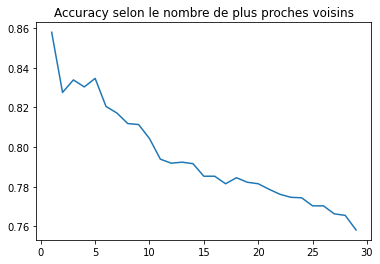

In [ ]:
#on détermine les paramètres
parameters = {'n_neighbors': list(range(1,30))}

#on applique la fonction gridsearch au modèle knn
grid_knn=GridSearchCV(clf_knn2,parameters)

#on entraîne grid_knn sur l'ensemble d'entraînement
grille_knn =grid_knn.fit(X_train, y_train)

#on peut afficher toutes les combinaisons de paramètres
res=grille_knn.cv_results_
test_score = res['mean_test_score']
plt.plot(range(1,30),test_score)
plt.title('Accuracy selon le nombre de plus proches voisins');

2 - Ensuite leaf_size

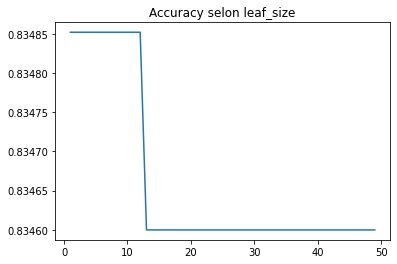

In [ ]:
#on détermine les paramètres
parameters = {'leaf_size': list(range(1,50))}

#on applique la fonction gridsearch au modèle knn
grid_knn=GridSearchCV(clf_knn2,parameters)

#on entraîne grid_svc sur l'ensemble d'entraînement
grille_knn=grid_knn.fit(X_train, y_train)

#on peut afficher toutes les combinaisons de paramètres
res=grille_knn.cv_results_
test_score = res['mean_test_score']
plt.plot(range(1,50),test_score)
plt.title('Accuracy selon leaf_size');

très peu d'impact.

3- enfin le p

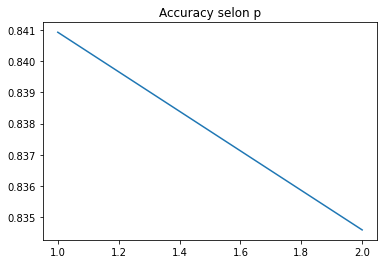

In [ ]:
#on détermine les paramètres
parameters = {'p': [1,2]}

#on applique la fonction gridsearch au modèle knn
grid_knn=GridSearchCV(clf_knn2,parameters)

#on entraîne grid_svc sur l'ensemble d'entraînement
grille_knn=grid_knn.fit(X_train, y_train)

#on peut afficher toutes les combinaisons de paramètres
res=grille_knn.cv_results_
test_score = res['mean_test_score']
plt.plot(range(1,3),test_score)
plt.title('Accuracy selon p');

Maintenant qu'on a une idée de l''étendue des hyperparamètres, on peut faire le gridsearch sur tous les hyperparamètres

In [ ]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 
#C:doit être strictement positif
#kernel a 5 possibilités décrites, mais quand on utilise 'precomputed', cela ne fonctionne pas
# gamma:'scale' 'auto' ou des nombres décimaux
parametres_knn= {
    'leaf_size':list(range(1,5)),
    'n_neighbors': list(range(1,10)),
    'p':[1,2],
    'metric': ['minkowski','manhattan','chebyshev']
}

#on applique la fonction gridsearch au modèle knn
grid_knn=GridSearchCV(clf_knn2,parametres_knn)

#on entraîne grid_knn sur l'ensemble d'entraînement
grille_knn=grid_knn.fit(X_train, y_train)

In [ ]:
# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le KNN sont ',grille_knn.best_params_)

les meilleurs paramètres pour le KNN sont  {'leaf_size': 4, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1}


In [ ]:
#on refait les prédictions de classe avec les paramètres optimisés
y_pred_knn_grid =grid_knn.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])

Classes prédites KNN,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,65,5,0,0,0,0,0
B,4,142,22,0,2,0,0
C,0,15,224,19,0,0,0
D,0,3,22,233,15,0,0
E,0,0,1,16,269,11,0
F,0,0,0,0,12,164,2
G,0,0,0,0,0,2,71


In [ ]:
# Accuracy de clf_knn2 optimisé
acc_knn_grid = accuracy_score(y_test, y_pred_knn_grid)

# Affichage des métriques
print("L'accuracy de clf_knn2 est de", acc_knn_grid)

# Enregistrement du modèle
dump(grid_knn, 'clf_knn_grid.joblib')

L'accuracy de clf_knn2 est de 0.8855193328279


['clf_knn_grid.joblib']

###### Classifieur Random Forest (sans rééchantillonnage)

In [ ]:
# Instanciation du classifieur
clf_rf2 = RandomForestClassifier()     # A définir : sélection des hyperparamètres

clf_rf2.fit(X_train, y_train)          # Entraînement du classifieur

y_pred_rf2 = clf_rf2.predict(X_test)   # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_rf2, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

Classes prédites RF,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,67,3,0,0,0,0,0
B,4,154,10,0,2,0,0
C,0,9,232,17,0,0,0
D,0,0,14,246,13,0,0
E,0,0,0,13,277,7,0
F,0,0,0,0,8,168,2
G,0,0,0,0,0,2,71


In [ ]:
# Accuracy de clf_rf2
acc_rf = accuracy_score(y_test, y_pred_rf2)

# Affichage des métriques
print("L'accuracy de clf_rf2 est de", acc_rf)

# Enregistrement du modèle
dump(clf_rf2, 'clf_rf2.joblib')

L'accuracy de clf_rf2 est de 0.9211523881728583


['clf_rf2.joblib']

Choix des hyperparamètres *(**Camille**)*

Les hyperparamètres sur lesquels on peut jouer sont:
- n_estimators (entier égal au nombre d'arbres, 100 par défaut)
- criterion : {“gini”, “entropy”, “log_loss”}, default=”gini”
- max_depth : int, default=None
- n_jobs : int, default=None

et bien d'autres!


In [ ]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 
#C:doit être strictement positif
#kernel a 5 possibilités décrites, mais quand on utilise 'precomputed', cela ne fonctionne pas
# gamma:'scale' 'auto' ou des nombres décimaux
parametres_rf= {
    'n_estimators':[200,300,400,500,600,700],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    #'random_state': [i for i in range(0, 101)]
   
}

#on applique la fonction gridsearch au modèle rf
grid_rf=GridSearchCV(clf_rf2,param_grid=parametres_rf,cv=5)

#on entraîne grid_rf sur l'ensemble d'entraînement
grille_rf=grid_rf.fit(X_train, y_train)

In [ ]:
# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le RF sont ',grille_rf.best_params_)

les meilleurs paramètres pour le RF sont  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}


Section à revoir car il semble qu'il y ait un doublon

In [ ]:
#on applique la fonction gridsearch au modèle rf
# grid_rf=GridSearchCV(clf_rf2,parametres_rf)

#on entraîne grid_rf sur l'ensemble d'entraînement
# grille_rf=grid_rf.fit(X_train, y_train)

In [ ]:
#on refait les prédictions de classe avec les paramètres optimisés
y_pred_rf_grid =grille_rf.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_rf_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

Classes prédites RF,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,67,3,0,0,0,0,0
B,4,153,11,0,2,0,0
C,0,8,236,14,0,0,0
D,0,0,14,247,12,0,0
E,0,0,1,12,275,9,0
F,0,0,0,0,8,168,2
G,0,0,0,0,0,2,71


In [ ]:
# Accuracy de clf_rf2 optimisé
acc_rf_grid = accuracy_score(y_test, y_pred_rf_grid)

# Affichage des métriques
print("L'accuracy de clf_rf2 est de", acc_rf_grid)

# Enregistrement du modèle
dump(grid_rf, 'clf_rf_grid.joblib')

L'accuracy de clf_rf2 est de 0.9226686884003032


['clf_rf_grid.joblib']

In [ ]:
# On note que sans rééchantillonnage, on a des résultats très intéressants
# Cela peut s'expliquer par le fait qu'on a beaucoup plus d'échantillons
# Les classes les plus polluantes sont très bien classées, ce qui est le plus intéressant
# On note que la classe G n'est contrainte que par sa limite inférieure
# Le classifieur RF a la meilleure accuracy.
# Vu les scores hyper-élevés, il peut y avoir de l'overfitting

Poids des variables explicatives (Camille)

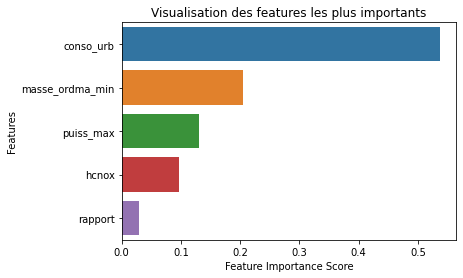

In [ ]:
#on veut identifier quelles variables pèsent le plus dans la classification
feature_scores = pd.Series(clf_rf2.feature_importances_, index=feats_quant.columns).sort_values(ascending=False)

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualisation des features les plus importants")
plt.show();

###### Voting Classifier (sans rééchantillonnage)

In [ ]:
# Instanciation du classifieur
clf_vc2 = VotingClassifier([('rf', clf_rf2), ('svc', clf_svc2), ('knn', clf_knn2)], voting = 'hard')

# Création du cross-validator
cv3 = KFold(n_splits = 3) # Question : comment choisir les autres paramètres du CV? Comment définir le nombre optimal de splits?

# Validation croisée et évaluation des classifieurs
for clf, label in zip([clf_rf2, clf_svc2, clf_knn2, clf_vc2], ['Random Forest', 'SVC', 'KNN', 'Voting Classifier']):
    scores = cross_validate(clf, feats_quant, target, cv=cv3, scoring=['accuracy','f1_weighted'])
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
          "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1_weighted'].mean(), scores['test_f1_weighted'].std()))

[Random Forest]: 
 Accuracy: 0.84 (+/- 0.03) F1 score: 0.84 (+/- 0.03)
[SVC]: 
 Accuracy: 0.33 (+/- 0.02) F1 score: 0.29 (+/- 0.05)
[KNN]: 
 Accuracy: 0.42 (+/- 0.04) F1 score: 0.43 (+/- 0.04)
[Voting Classifier]: 
 Accuracy: 0.57 (+/- 0.05) F1 score: 0.56 (+/- 0.06)


In [ ]:
# Suite au Voting Classifier, on onstate que le modèle RF clf_rf2 est celui qui donne de bien meilleurs résultats

In [ ]:
# Enregistrement du modèle
dump(clf_vc2, 'clf_vc2.joblib')

['clf_vc2.joblib']

#### Classification multiple pour Dataset déséquilibré

In [ ]:
# Distribution de la variable cible
target.value_counts(normalize = True)
# On a une distribution légèrement déséquilibrée

E    0.227764
D    0.202731
C    0.194576
F    0.150958
B    0.123459
G    0.058031
A    0.042481
Name: cat_poll, dtype: float64

##### Oversampling avec RandomOverSampler

In [ ]:
(X_ro, y_ro) = RandomOverSampler().fit_resample(X_train, y_train)

# On vérifie qu'on a bien rééquilibré la cible
print(y_ro.value_counts())

E    904
A    904
D    904
B    904
C    904
F    904
G    904
Name: cat_poll, dtype: int64


###### Classifieur SVC

In [ ]:
# Instanciation du classifieur
clf_svc = SVC(gamma = 'scale')

clf_svc.fit(X_ro, y_ro)          # Entraînement du classifieur

y_pred_svc = clf_svc.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

Classes prédites SVC,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,66,4,0,0,0,0,0
B,14,141,13,2,0,0,0
C,0,29,203,26,0,0,0
D,0,0,28,235,9,1,0
E,0,0,0,43,241,13,0
F,0,0,0,0,7,167,4
G,0,0,0,0,0,1,72


In [ ]:
# La matrice de confusion semble donner des résultats intéressants
# On affiche les métriques dans le rapport
print(classification_report_imbalanced(y_test, y_pred_svc))

                   pre       rec       spe        f1       geo       iba       sup

          A       0.82      0.94      0.99      0.88      0.97      0.93        70
          B       0.81      0.83      0.97      0.82      0.90      0.79       170
          C       0.83      0.79      0.96      0.81      0.87      0.74       258
          D       0.77      0.86      0.93      0.81      0.90      0.80       273
          E       0.94      0.81      0.98      0.87      0.89      0.78       297
          F       0.92      0.94      0.99      0.93      0.96      0.92       178
          G       0.95      0.99      1.00      0.97      0.99      0.98        73

avg / total       0.86      0.85      0.97      0.85      0.91      0.82      1319



In [ ]:
# Les scores sont plutôt bons avec le classifieur SVC, le modèle à des valeurs de f1-score et geometric mean élevées
# Les voitures de la classe D sont les moins bien classées

###### Classifieur KNN

In [ ]:
# Instanciation du classifieur
clf_knn = KNeighborsClassifier()

clf_knn.fit(X_ro, y_ro)          # Entraînement du classifieur

y_pred_knn = clf_knn.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])


Classes prédites KNN,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,68,2,0,0,0,0,0
B,10,137,21,1,1,0,0
C,0,28,204,26,0,0,0
D,0,4,26,231,12,0,0
E,0,0,0,32,248,17,0
F,0,0,0,0,10,162,6
G,0,0,0,0,0,5,68


In [ ]:
# La matrice de confusion donne de bons résultats
# On affiche les métriques dans le rapport
print(classification_report_imbalanced(y_test, y_pred_knn))

                   pre       rec       spe        f1       geo       iba       sup

          A       0.87      0.97      0.99      0.92      0.98      0.96        70
          B       0.80      0.81      0.97      0.80      0.88      0.77       170
          C       0.81      0.79      0.96      0.80      0.87      0.74       258
          D       0.80      0.85      0.94      0.82      0.89      0.79       273
          E       0.92      0.84      0.98      0.87      0.90      0.80       297
          F       0.88      0.91      0.98      0.90      0.94      0.89       178
          G       0.92      0.93      1.00      0.93      0.96      0.92        73

avg / total       0.85      0.85      0.97      0.85      0.91      0.81      1319



In [ ]:
# Les scores obtenus sont élevés
# Même les voitures de la classe D sont bien classées
# Meilleurs résultats qu'avec le SVC
# Tester s'il n'y a pas un phénomène d'overfitting

###### Classifieur Random Forest

In [ ]:
# Instanciation du classifieur
clf_rf = RandomForestClassifier()

clf_rf.fit(X_ro, y_ro)          # Entraînement du classifieur

y_pred_rf = clf_rf.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_rf, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

Classes prédites RF,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,68,2,0,0,0,0,0
B,4,155,9,0,2,0,0
C,0,10,236,12,0,0,0
D,0,0,13,246,14,0,0
E,0,0,0,13,276,8,0
F,0,0,0,0,8,168,2
G,0,0,0,0,0,2,71


In [ ]:
# La matrice de confusion semble donner des résultats probants
# On affiche les métriques dans le rapport
print(classification_report_imbalanced(y_test, y_pred_rf))

                   pre       rec       spe        f1       geo       iba       sup

          A       0.94      0.97      1.00      0.96      0.98      0.97        70
          B       0.93      0.91      0.99      0.92      0.95      0.90       170
          C       0.91      0.91      0.98      0.91      0.95      0.89       258
          D       0.91      0.90      0.98      0.90      0.94      0.87       273
          E       0.92      0.93      0.98      0.92      0.95      0.90       297
          F       0.94      0.94      0.99      0.94      0.97      0.93       178
          G       0.97      0.97      1.00      0.97      0.99      0.97        73

avg / total       0.92      0.92      0.98      0.92      0.95      0.90      1319



In [ ]:
# Ici aussi les scores sont très élevés
# Les voitures de classe D sont bien déterminées
# Meilleurs scores qu'avec le SVC et KNN
# Checker aussi s'il n'y a pas d'overfitting
# Il faudrait intégrer des données de validation pour tester la performance réelle du modèle

###### Voting Classifier

In [ ]:
# Instanciation du classifieur
clf_vc = VotingClassifier([('rf', clf_rf), ('svc', clf_svc), ('knn', clf_knn)], voting = 'hard')

# Création du cross-validator
cv3 = KFold(n_splits = 3) # Question : comment choisir les autres paramètres du CV? Comment définir le nombre optimal de splits?

# Validation croisée et évaluation des classifieurs
for clf, label in zip([clf_rf, clf_svc, clf_knn, clf_vc], ['Random Forest', 'SVC', 'KNN', 'Voting Classifier']):
    scores = cross_validate(clf, feats_quant, target, cv=cv3, scoring=['accuracy','f1_weighted'])
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
          "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1_weighted'].mean(), scores['test_f1_weighted'].std()))

[Random Forest]: 
 Accuracy: 0.84 (+/- 0.03) F1 score: 0.84 (+/- 0.03)
[SVC]: 
 Accuracy: 0.33 (+/- 0.02) F1 score: 0.29 (+/- 0.05)
[KNN]: 
 Accuracy: 0.42 (+/- 0.04) F1 score: 0.43 (+/- 0.04)
[Voting Classifier]: 
 Accuracy: 0.57 (+/- 0.05) F1 score: 0.56 (+/- 0.06)


In [ ]:
# Enregistrement du modèle
dump(clf_vc, 'clf_vc.joblib')

['clf_vc.joblib']

In [ ]:
# En regardant les chiffres de l'oversampling, on peut se demander s'il n'y a pas un biais qui est induit de cette façon
# Le nombre d'échantillons des classes avec peu d'effectifs est trop surévalué
# Question : Est-il nécessaire de conserver les classes peu représentées?

##### Undersampling avec RandomUnderSampler

In [ ]:
X_ru, y_ru = RandomUnderSampler().fit_resample(X_train, y_train)

# On vérifie qu'on a bien rééquilibré la cible
print(y_ru.value_counts())

A    154
B    154
C    154
D    154
E    154
F    154
G    154
Name: cat_poll, dtype: int64


###### Classifieur SVC

In [ ]:
clf_SVC_ru = SVC(gamma = 'scale')

clf_SVC_ru.fit(X_ru, y_ru)

y_pred_ru = clf_SVC_ru.predict(X_test)

pd.crosstab(y_test, y_pred_ru, rownames = ['Classes réelles'], colnames = ['Classes prédites'])

Classes prédites,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,66,4,0,0,0,0,0
B,25,128,15,2,0,0,0
C,2,35,194,27,0,0,0
D,0,3,49,197,21,3,0
E,0,0,0,54,222,21,0
F,0,0,0,0,12,159,7
G,0,0,0,0,0,4,69


In [ ]:
print(classification_report_imbalanced(y_test, y_pred_ru))

                   pre       rec       spe        f1       geo       iba       sup

          A       0.71      0.94      0.98      0.81      0.96      0.92        70
          B       0.75      0.75      0.96      0.75      0.85      0.71       170
          C       0.75      0.75      0.94      0.75      0.84      0.69       258
          D       0.70      0.72      0.92      0.71      0.82      0.65       273
          E       0.87      0.75      0.97      0.80      0.85      0.71       297
          F       0.85      0.89      0.98      0.87      0.93      0.86       178
          G       0.91      0.95      0.99      0.93      0.97      0.94        73

avg / total       0.79      0.78      0.96      0.78      0.86      0.74      1319



In [ ]:
# On a remarqué que les temps de traitement étaient plus longs avec les techniques d'Oversampling mais avec des scores plus élevés
# Le nombre d'échantillons obtenus avec l'undersampling nous semble trop faible pour la modélisation
# On pourra tester la robustesse des modèles sur les datasets des autres années (2012, 2014)

### **Cas 2 : Modélisation avec les variables qualitatives**

In [ ]:
# De prime abord, toutes les variables qualitatives ne seraient pas utiles dans la modélisation
# Les variables qui nous semblent avoir un sens seraient : le type de boîte, le carburant
# Documentation nécessaire pour avoir le recul 'métier'
# A noter que l'année du dataset correspond à l'année du "Wolkswagengate" donc les chiffres ne sont pas forcément représentatifs des données réelles

In [ ]:
# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.25) # Question : Faut-il rajouter un paramètre random_state?

In [ ]:
# Les variables numériques doivent être standardisées
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###### Classifieur SVC (avec variables qualitatives)

In [ ]:
# Instanciation du classifieur
clf_svc3 = SVC(gamma = 'scale')        # Question : Comment initialiser les hyperparamètres ?

clf_svc3.fit(X_train, y_train)         # Entraînement du classifieur

y_pred_svc3 = clf_svc3.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc3, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

Classes prédites SVC,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,10,37,2,0,0,0,0
B,3,90,68,3,1,0,0
C,2,29,176,37,3,0,0
D,2,6,53,214,17,0,0
E,0,1,6,47,224,18,0
F,0,0,1,0,34,149,5
G,0,0,0,0,0,13,68


In [ ]:
# Accuracy de clf_svc3
acc_svc = accuracy_score(y_test, y_pred_svc3)

# Affichage des métriques
print("L'accuracy de clf_svc3 est de", acc_svc)

# Enregistrement du modèle
dump(clf_svc3, 'clf_svc3.joblib')

L'accuracy de clf_svc3 est de 0.7058377558756633


['clf_svc3.joblib']

In [ ]:
# On constate que l'accuracy du classifieur SVC a diminué

Optimisation des hyperparamètres (Camille)

In [ ]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 
#C:doit être strictement positif
#kernel a 5 possibilités décrites, mais quand on utilise 'precomputed', cela ne fonctionne pas
# gamma:'scale' 'auto' ou des nombres décimaux
parametres= {
        'C':[1,50,100,200],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':[0.05,0.07,0.1,0.2,0.5,1]
}

#on applique la fonction gridsearch au modèle SVC
grid_svc3=GridSearchCV(clf_svc3,parametres)

#on entraîne grid_svc sur l'ensemble d'entraînement
grille=grid_svc3.fit(X_train, y_train)

# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le SVC sont ',grille.best_params_)

KeyboardInterrupt: ignored

In [ ]:
#on refait les prédictions de classe avec les paramètres optimisés
y_pred_svc3_grid =grid_svc3.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc3_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

In [ ]:
# Accuracy de clf_svc3 optimisé
acc_svc3_grid = accuracy_score(y_test, y_pred_svc3_grid)

# Affichage des métriques
print("L'accuracy de clf_svc3_grid est de", acc_svc3_grid)


###### Classifieur KNN (avec variables qualitatives)

In [ ]:
# Instanciation du classifieur
clf_knn3 = KNeighborsClassifier()       # A définir : sélection des hyperparamètres

clf_knn3.fit(X_train, y_train)          # Entraînement du classifieur

y_pred_knn3 = clf_knn3.predict(X_test)  # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn3, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])


Classes prédites KNN,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,23,19,7,0,0,0,0
B,20,76,54,9,6,0,0
C,5,44,154,38,6,0,0
D,1,22,78,163,28,0,0
E,2,8,21,40,210,15,0
F,1,0,0,7,31,148,2
G,0,0,0,0,9,27,45


In [ ]:
# Accuracy de clf_knn3
acc_knn = accuracy_score(y_test, y_pred_knn3)

# Affichage des métriques
print("L'accuracy de clf_knn3 est de", acc_knn)

# Enregistrement du modèle
dump(clf_knn3, 'clf_knn3.joblib')

L'accuracy de clf_knn3 est de 0.6209249431387415


['clf_knn3.joblib']

Optimisation des hyperparamètres (Camille)

In [ ]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 
#C:doit être strictement positif
#kernel a 5 possibilités décrites, mais quand on utilise 'precomputed', cela ne fonctionne pas
# gamma:'scale' 'auto' ou des nombres décimaux
parametres_knn= {
    'leaf_size':list(range(1,5)),
    'n_neighbors': list(range(1,10)),
    'p':[1,2],
    'metric': ['minkowski','manhattan','chebyshev']
}

#on applique la fonction gridsearch au modèle knn
grid_knn3=GridSearchCV(clf_knn3,parametres_knn)

#on entraîne grid_knn sur l'ensemble d'entraînement
grille_knn3=grid_knn3.fit(X_train, y_train)

# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le KNN sont ',grille_knn3.best_params_)

les meilleurs paramètres pour le KNN sont  {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1}


In [ ]:
#on refait les prédictions de classe avec les paramètres optimisés
y_pred_knn3_grid =grid_knn3.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn3_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])

In [ ]:
# Accuracy de clf_knn3 optimisé
acc_knn3_grid = accuracy_score(y_test, y_pred_knn3_grid)

# Affichage des métriques
print("L'accuracy de clf_knn2 est de", acc_knn3_grid)

# Enregistrement du modèle
#dump(grid_knn, 'clf_knn_grid.joblib')

###### Classifieur Random Forest(avec variables qualitatives)

In [ ]:
# Instanciation du classifieur
clf_rf3 = RandomForestClassifier()     # A définir : sélection des hyperparamètres

clf_rf3.fit(X_train, y_train)          # Entraînement du classifieur

y_pred_rf3 = clf_rf3.predict(X_test)   # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_rf3, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

In [ ]:
# Accuracy de clf_rf3
acc_rf = accuracy_score(y_test, y_pred_rf3)

# Affichage des métriques
print("L'accuracy de clf_rf3 est de", acc_rf)

# Enregistrement du modèle
dump(clf_rf3, 'clf_rf3.joblib')

### **Cas 3 : Modélisation avec les variables qualitatives avec LabelEncoder (Camille)**

On essaye ici de coder les variables qualitatives avec LabelEncoder, donc pas 

---

en 0-1 mais en une seule variable à plusieurs valeurs

In [ ]:
# Les variables catégorielles sont transformées en labels numériques
labelencoder = LabelEncoder()
var_cat_enc=var_cat.apply(labelencoder.fit_transform)

In [ ]:
# On récupère les variables explicatives = variables quantitatives et qualitatives encodées
feats2 = var_num.join(var_cat_enc)

In [ ]:
# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(feats2, target, test_size = 0.25) 

# Les variables quantitatives doivent être standardisées
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[var_num.columns]=scaler.fit_transform(X_train[var_num.columns])
X_test[var_num.columns] = scaler.transform(X_test[var_num.columns])

In [ ]:
X_train

In [ ]:
# Instanciation du classifieur
clf_svc4 = SVC(gamma = 'scale')        

clf_svc4.fit(X_train, y_train)         # Entraînement du classifieur

y_pred_svc4 = clf_svc4.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc4, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

In [ ]:
# Accuracy de clf_svc4
acc_svc = accuracy_score(y_test, y_pred_svc4)

# Affichage des métriques
print("L'accuracy de clf_svc4 est de", acc_svc)


In [ ]:
# On constate que l'accuracy du classifieur SVC a encore diminué par rapport au get_dummies. qu'en est-il avec l'optimisation des hyperparamètres?

Optimisation des hyperparamètres

In [ ]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 
#C:doit être strictement positif
#kernel a 5 possibilités décrites, mais quand on utilise 'precomputed', cela ne fonctionne pas
# gamma:'scale' 'auto' ou des nombres décimaux
parametres= {
        'C':[1,50,100,200],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':[0.05,0.07,0.1,0.2,0.5,1]
}

#on applique la fonction gridsearch au modèle SVC
grid_svc4=GridSearchCV(clf_svc4,parametres)

#on entraîne grid_svc sur l'ensemble d'entraînement
grille=grid_svc4.fit(X_train, y_train)

# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le SVC sont ',grille.best_params_)

In [ ]:
#on refait les prédictions de classe avec les paramètres optimisés
y_pred_svc4_grid =grid_svc4.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc4_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

In [ ]:
# Accuracy de clf_svc4 optimisé
acc_svc4_grid = accuracy_score(y_test, y_pred_svc4_grid)

# Affichage des métriques
print("L'accuracy de clf_svc3_grid est de", acc_svc4_grid)


### **Validation des modèles**

In [ ]:
# Chargement des données 2014
df_2014 = pd.read_csv('/content/drive/MyDrive/data2014_2.csv')

df_2014.head()

In [ ]:
df_2014.duplicated().sum()

In [ ]:
# On conserve les variables numériques d'intérêt
data = df_2014[['puiss_max', 'conso_urb', 'hcnox', 'masse_ordma_min', 'rapport']]

# On isole la cible
target = df_2014['Classe']
data.head()

In [ ]:
target.head()

In [ ]:
# Standardisation des données
scaler = StandardScaler()
data_scal = scaler.fit_transform(data)

#### **Modèle RF**

In [ ]:
# Test du modèle RF
y_pred_2014 = clf_rf2.predict(data_scal)

# Matrice de confusion
pd.crosstab(target, y_pred_2014, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

In [ ]:
# Métriques sur les données 2014
# Accuracy de clf_rf2
acc_rf_2014 = accuracy_score(target, y_pred_2014)

# Affichage des métriques
print("L'accuracy de clf_rf2 est de", acc_rf_2014)

#### **Modèle SVC**

In [ ]:
# Test du modèle SVC

y_pred_2014 = clf_svc2.predict(data_scal)

# Matrice de confusion
pd.crosstab(target, y_pred_2014, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

In [ ]:
# Métriques sur les données 2014
# Accuracy de clf_svc2
acc_svc_2014 = accuracy_score(target, y_pred_2014)

# Affichage des métriques
print("L'accuracy de clf_svc2 est de", acc_svc_2014)

#### **Modèle KNN**

In [ ]:
# Test du modèle KNN
clf_knn2.fit(X_train, y_train)
y_pred_2014 = clf_knn2.predict(X_test)

# Matrice de confusion
pd.crosstab(y_test, y_pred_2014, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])

In [ ]:
# Métriques sur les données 2014
# Accuracy de clf_rf2
acc_knn_2014 = accuracy_score(y_test, y_pred_2014)

# Affichage des métriques
print("L'accuracy de grid_knn est de", acc_knn_2014)